# Implementacion del modelo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import itertools    
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

import pathlib

In [3]:
# Set the path to the dataset folder
data_dir = pathlib.Path('dataset')

# Get the total number of images in the dataset
image_count = len(list(data_dir.glob('*/*/*.jpg'))) + len(list(data_dir.glob('*/*/*.png')))
print("Total number of images =", image_count)


Total number of images = 12443


In [4]:
# Specify the number of classes
num_classes = 19

# Specify the image size
img_height = 64
img_width = 64

# Generate the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir / 'train',
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=None
)

# Generate the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir / 'test',
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    seed=42,
    validation_split=None
)

Found 9954 files belonging to 19 classes.
Found 2489 files belonging to 19 classes.


In [5]:
# Preprocess the training dataset
train_images = []
train_labels = []
for images, labels in train_ds:
    features = tf.image.resize(images, (img_height, img_width))  # Resize images
    features = tf.reshape(features, (-1, img_height * img_width * 3))  # Flatten images
    train_images.extend(features.numpy())
    train_labels.extend(labels.numpy())

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Preprocess the validation dataset
val_images = []
val_labels = []
for images, labels in val_ds:
    features = tf.image.resize(images, (img_height, img_width))  # Resize images
    features = tf.reshape(features, (-1, img_height * img_width * 3))  # Flatten images
    val_images.extend(features.numpy())
    val_labels.extend(labels.numpy())

val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [6]:
# Train the SVM model
model = svm.SVC(kernel='linear')
model.fit(train_images, train_labels)

SVC(kernel='linear')

In [7]:
# Generate the predicted categories and true categories
predicted_categories = model.predict(val_images)
true_categories = val_labels

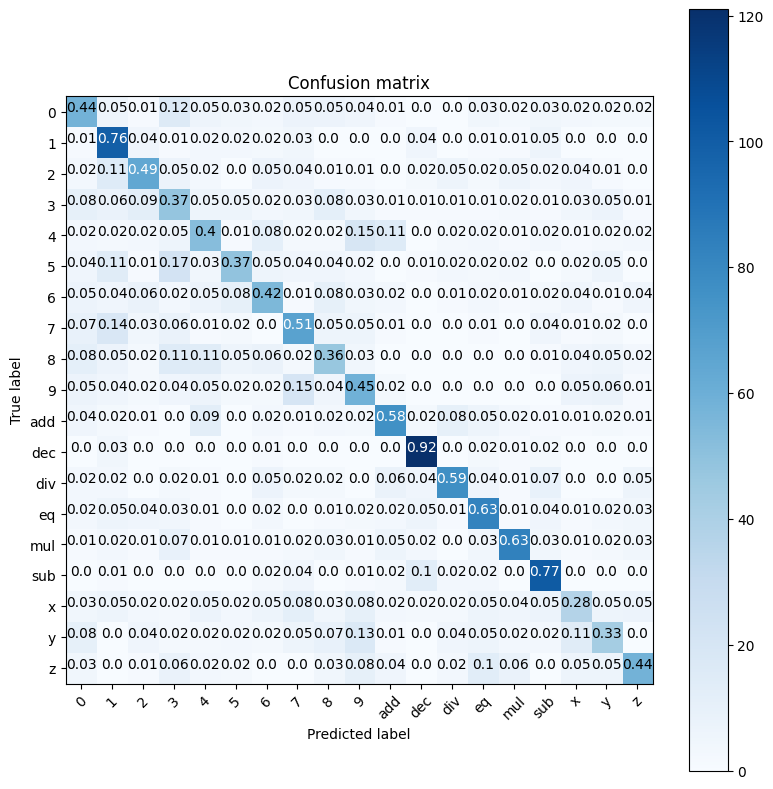

In [8]:
# Generate the confusion matrix
cm = confusion_matrix(true_categories, predicted_categories)

# Compute accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)

# Define the class names
class_names = train_ds.class_names

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

figure = plot_confusion_matrix(cm, class_names)
plt.show()

In [9]:
# Print accuracy and classification report
print("\nTest Accuracy:", accuracy)

print("\n\nClassification Report:")
print(classification_report(true_categories, predicted_categories, target_names=class_names))


Test Accuracy: 0.5126556850140619


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       131
           1       0.49      0.76      0.59       131
           2       0.54      0.49      0.51       131
           3       0.30      0.37      0.33       131
           4       0.40      0.40      0.40       131
           5       0.53      0.37      0.44       131
           6       0.45      0.42      0.43       131
           7       0.47      0.51      0.49       131
           8       0.39      0.36      0.37       131
           9       0.40      0.45      0.42       131
         add       0.60      0.58      0.59       131
         dec       0.75      0.92      0.83       131
         div       0.68      0.59      0.63       131
          eq       0.57      0.63      0.60       131
         mul       0.69      0.63      0.66       131
         sub       0.64      0.77      0.70       131
           x       0.